In [35]:
#Import necessary libraries

#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os

In [3]:
os.getcwd()

'C:\\Users\\agniv\\Downloads'

In [3]:
#importing the training data
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
positivemessages = imdb_data[imdb_data['sentiment'] == 'positive']
positivemessages.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
9,If you like original gut wrenching laughter yo...,positive
14,This a fantastic movie of three prisoners who ...,positive
16,Some films just simply should not be remade. T...,positive
18,"I remember this film,it was the first film i h...",positive


In [7]:
negativemessages = imdb_data[imdb_data['sentiment'] == 'negative']
negativemessages.head(10)

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
12,So im not a big fan of Boll's work but then ag...,negative
13,The cast played Shakespeare.<br /><br />Shakes...,negative
15,"Kind of drawn in by the erotic scenes, only to...",negative
17,This movie made it into one of my top 10 most ...,negative
19,An awful film! It must have been up against so...,negative


In [8]:
negativemessages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 3 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 585.9+ KB


In [9]:
positivemessages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 49995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 585.9+ KB


In [42]:
text = " ".join(review for review in positivemessages.review)

In [43]:
# Create stopword list:
stopwords = set(STOPWORDS)

In [44]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

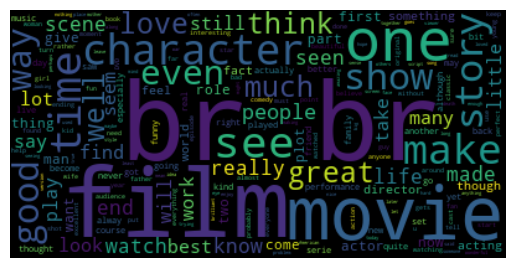

In [45]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
text = " ".join(review for review in negativemessages.review)

In [47]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

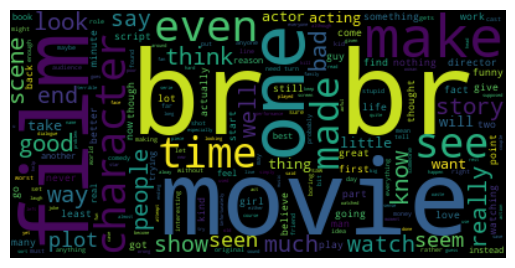

In [48]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
#split the dataset  
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:50000]
test_sentiments=imdb_data.sentiment[40000:50000]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [11]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [12]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

    

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

C:\Users\agniv\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [13]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [14]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)


In [15]:
def remove_panctuation(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [16]:
# Python provides a constant called string.punctuation that provides a great list of punctuation characters.
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


# # We can use regular expressions to select for the punctuation characters and use the sub() function to replace them with nothing.
## For example

In [17]:
import re
text= 'My beautiful picture , classic ! , awwsum ?'
tokens=text.split()

re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub( '' , w) for w in tokens]

In [18]:
def remove_panctuation(text):
    tokens=text.split()
    re_punc=re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if len(word) > 2]
    return tokens
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_panctuation)

In [20]:
imdb_data.head(20)

,review,sentiment
0,"[one, the, other, review, mention, that, after...",positive
1,"[wonder, littl, production, the, film, techniq...",positive
2,"[thought, thi, wonder, way, spend, time, too, ...",positive
3,"[basic, there, famili, where, littl, boy, jake...",negative
4,"[petter, mattei, love, the, time, money, visua...",positive
5,"[probabl, alltim, favorit, movie, stori, selfl...",positive
6,"[sure, would, like, see, resurrect, date, seah...",positive
7,"[thi, show, amazing, fresh, innov, idea, the, ...",negative
8,"[encourag, the, posit, comment, about, thi, fi...",negative
9,"[you, like, origin, gut, wrench, laughter, you...",positive


In [19]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)


{"hadn't", 'can', 'same', 's', 'won', 'our', 'why', 'too', 'my', 'herself', 'have', 'wasn', 'll', "that'll", 'how', 'few', 'd', 'below', 'y', 'been', 'has', 'having', 'aren', 'some', 'to', 'shan', "you're", "hasn't", 'o', "wasn't", 'there', 'do', 'will', 'then', 'other', "shouldn't", 'these', 'her', 'up', "couldn't", 'as', "mustn't", 'yourself', 'once', 'a', 'own', 'so', "you've", 'we', 'than', 'while', "shan't", 're', 'don', 'down', "it's", 'off', 'myself', 'isn', 't', 'over', 'for', "you'd", 'had', 'was', 'an', 'you', 'they', 'ourselves', 'here', 'hers', 'mustn', 'yourselves', 'into', 'himself', 'their', 'but', 'further', 'shouldn', 'its', 'themselves', 'which', 'out', 'more', 'didn', 'if', 'were', 'who', "won't", 'ours', 'doesn', 'under', 'when', 'against', 'through', 'hasn', 'mightn', "needn't", 'this', 'after', 'on', 'itself', 'theirs', 'what', 'any', 'only', 'until', 'very', 've', 'your', 'because', 'above', 'no', "isn't", 'those', 'at', 'is', 'each', 'needn', 'about', 'of', 'doe

In [20]:
imdb_data.head(20)

,review,sentiment
0,"[ ' one ' , ' ' , ' ' , ' review ' , ' mention...",positive
1,"[ ' wonder ' , ' littl ' , ' production ' , ' ...",positive
2,"[ ' thought ' , ' thi ' , ' wonder ' , ' way '...",positive
3,"[ ' basic ' , ' ' , ' famili ' , ' ' , ' littl...",negative
4,"[ ' petter ' , ' mattei ' , ' love ' , ' ' , '...",positive
5,"[ ' probabl ' , ' alltim ' , ' favorit ' , ' m...",positive
6,"[ ' sure ' , ' would ' , ' like ' , ' see ' , ...",positive
7,"[ ' thi ' , ' show ' , ' amazing ' , ' fresh '...",negative
8,"[ ' encourag ' , ' ' , ' posit ' , ' comment '...",negative
9,"[ ' ' , ' like ' , ' origin ' , ' gut ' , ' wr...",positive


In [21]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [22]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
imdb_data.dropna(inplace=True)

blanks = []  # start with an empty list

for i,lb,rv in imdb_data.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

imdb_data.drop(blanks, inplace=True)

In [23]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [25]:
imdb_data['scores'] = imdb_data['review'].apply(lambda review: sid.polarity_scores(review))
imdb_data.head()

,review,sentiment,scores
0,"[ ' one ' , ' ' , ' ' , ' review ' , ' mention...",positive,"{'neg': 0.242, 'neu': 0.659, 'pos': 0.099, 'co..."
1,"[ ' wonder ' , ' littl ' , ' production ' , ' ...",positive,"{'neg': 0.049, 'neu': 0.748, 'pos': 0.204, 'co..."
2,"[ ' thought ' , ' thi ' , ' wonder ' , ' way '...",positive,"{'neg': 0.16, 'neu': 0.61, 'pos': 0.23, 'compo..."
3,"[ ' basic ' , ' ' , ' famili ' , ' ' , ' littl...",negative,"{'neg': 0.185, 'neu': 0.686, 'pos': 0.129, 'co..."
4,"[ ' petter ' , ' mattei ' , ' love ' , ' ' , '...",positive,"{'neg': 0.014, 'neu': 0.777, 'pos': 0.209, 'co..."


In [26]:
imdb_data['compound']  = imdb_data['scores'].apply(lambda score_dict: score_dict['compound'])

imdb_data.head()

,review,sentiment,scores,compound
0,"[ ' one ' , ' ' , ' ' , ' review ' , ' mention...",positive,"{'neg': 0.242, 'neu': 0.659, 'pos': 0.099, 'co...",-0.9874
1,"[ ' wonder ' , ' littl ' , ' production ' , ' ...",positive,"{'neg': 0.049, 'neu': 0.748, 'pos': 0.204, 'co...",0.9186
2,"[ ' thought ' , ' thi ' , ' wonder ' , ' way '...",positive,"{'neg': 0.16, 'neu': 0.61, 'pos': 0.23, 'compo...",0.7842
3,"[ ' basic ' , ' ' , ' famili ' , ' ' , ' littl...",negative,"{'neg': 0.185, 'neu': 0.686, 'pos': 0.129, 'co...",-0.8020
4,"[ ' petter ' , ' mattei ' , ' love ' , ' ' , '...",positive,"{'neg': 0.014, 'neu': 0.777, 'pos': 0.209, 'co...",0.9803


In [29]:
imdb_data['comp_score'] = imdb_data['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')

imdb_data.head()

,review,sentiment,scores,compound,comp_score
0,"[ ' one ' , ' ' , ' ' , ' review ' , ' mention...",positive,"{'neg': 0.242, 'neu': 0.659, 'pos': 0.099, 'co...",-0.9874,negative
1,"[ ' wonder ' , ' littl ' , ' production ' , ' ...",positive,"{'neg': 0.049, 'neu': 0.748, 'pos': 0.204, 'co...",0.9186,positive
2,"[ ' thought ' , ' thi ' , ' wonder ' , ' way '...",positive,"{'neg': 0.16, 'neu': 0.61, 'pos': 0.23, 'compo...",0.7842,positive
3,"[ ' basic ' , ' ' , ' famili ' , ' ' , ' littl...",negative,"{'neg': 0.185, 'neu': 0.686, 'pos': 0.129, 'co...",-0.8020,negative
4,"[ ' petter ' , ' mattei ' , ' love ' , ' ' , '...",positive,"{'neg': 0.014, 'neu': 0.777, 'pos': 0.209, 'co...",0.9803,positive


In [33]:
imdb_data['review'][0]

"[ ' one ' , ' ' , ' ' , ' review ' , ' mention ' , ' ' , ' ' , ' watch ' , ' ' , ' episod ' , ' youll ' , ' hooked ' , ' ' , ' ' , ' right ' , ' thi ' , ' exactli ' , ' ' , ' happen ' , ' ' , ' meth ' , ' first ' , ' thing ' , ' ' , ' struck ' , ' ' , ' brutal ' , ' ' , ' unflinch ' , ' scene ' , ' violence ' , ' ' , ' set ' , ' right ' , ' ' , ' ' , ' word ' , ' trust ' , ' thi ' , ' ' , ' show ' , ' ' , ' ' , ' faint ' , ' heart ' , ' timid ' , ' thi ' , ' show ' , ' pull ' , ' punch ' , ' ' , ' regard ' , ' drugs ' , ' sex ' , ' violence ' , ' hardcore ' , ' ' , ' classic ' , ' use ' , ' ' , ' wordit ' , ' call ' , ' ' , ' ' , ' nicknam ' , ' given ' , ' ' , ' oswald ' , ' maximum ' , ' secur ' , ' state ' , ' penitentary ' , ' focus ' , ' mainli ' , ' emerald ' , ' city ' , ' experiment ' , ' section ' , ' ' , ' prison ' , ' ' , ' ' , ' ' , ' cell ' , ' ' , ' glass ' , ' front ' , ' ' , ' face ' , ' inwards ' , ' privaci ' , ' ' , ' high ' , ' ' , ' agenda ' , ' citi ' , ' home ' 

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [30]:
accuracy_score(imdb_data['sentiment'],imdb_data['comp_score'])

0.66216

In [31]:
print(classification_report(imdb_data['sentiment'],imdb_data['comp_score']))

              precision    recall  f1-score   support

    negative       0.75      0.49      0.59     25000
    positive       0.62      0.83      0.71     25000

    accuracy                           0.66     50000
   macro avg       0.68      0.66      0.65     50000
weighted avg       0.68      0.66      0.65     50000



In [32]:
print(confusion_matrix(imdb_data['sentiment'],imdb_data['comp_score']))

[[12267 12733]
 [ 4159 20841]]
